In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
data=pd.read_csv("c:\Epileptic Seizure Recognition.csv")


C:\Users\rjabj\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [ ]:
data.describe

<bound method NDFrame.describe of           Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  \
0      X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   
1      X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   
2         X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57   
3       X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   
4       X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
11495  X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  ...    15   
11496  X19.V1.354  -47  -11   28   77  141  211  246  240  193  ...   -65   
11497    X8.V1.28   14    6  -13  -16   10   26   27   -9    4  ...   -65   
11498  X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22  ...   121   
11499  X16.V1.210   29   41   57   72   74   62   54   43   31  ...   -59   

       X171  X172  X173  X174  X175  X176

In [ ]:
#Verification of any missing data
data.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [ ]:
#Verification of any duplicat rows
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
#Understanding the labals of the dataset
data['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

In [ ]:
#The column that contains the object is the first one ("Unnamed")
d=data.drop(['Unnamed'],axis=1,inplace=True)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3


<AxesSubplot:>

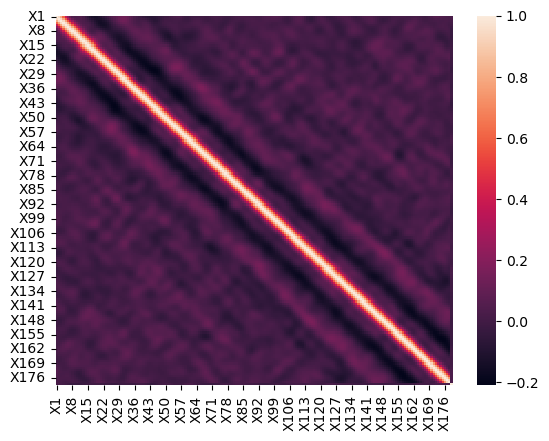

In [ ]:
#correlation
sns.heatmap(data.corr())

In [ ]:
# Prepare features (X) and labels (y)
X = np.asarray(data.iloc[:, :-1])  # Removing the last column, which is the target variable.
X = X.astype(float)
X

array([[ 135.,  190.,  229., ..., -116.,  -83.,  -51.],
       [ 386.,  382.,  356., ...,  154.,  143.,  129.],
       [ -32.,  -39.,  -47., ...,  -35.,  -35.,  -36.],
       ...,
       [  14.,    6.,  -13., ...,   -2.,   -1.,   -8.],
       [ -40.,  -25.,   -9., ...,   68.,   59.,   55.],
       [  29.,   41.,   57., ...,   -2.,    2.,   20.]])

In [ ]:
#Scaling the data
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

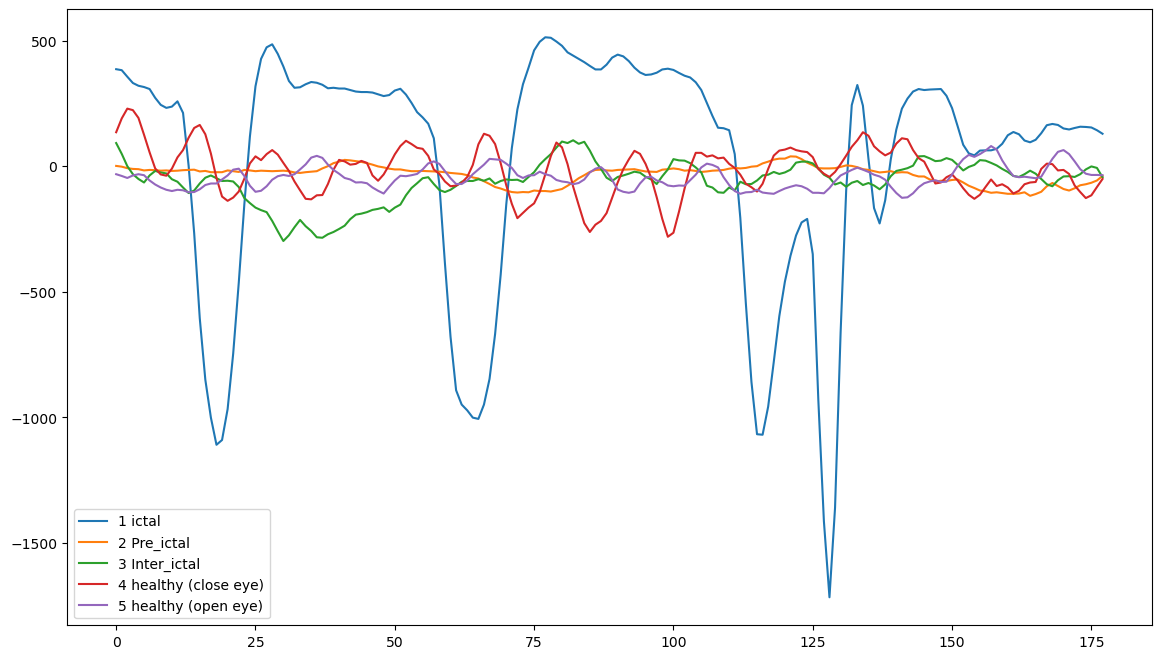

In [ ]:
#Understanding the lables
plt.figure(figsize=(14,8))
plt.plot(X[1,:],label='1 ictal')
plt.plot(X[7,:],label='2 Pre_ictal')
plt.plot(X[12,:],label='3 Inter_ictal')
plt.plot(X[0,:],label='4 healthy (close eye)')
plt.plot(X[2,:],label='5 healthy (open eye)')
plt.legend()
plt.show()

In [ ]:
#if the patient have ES y=1 else y=0
y = np.asarray(data['y'])
y = np.where(y == 1, 1, 0)
y

array([0, 1, 0, ..., 0, 0, 0])

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


C:\Users\rjabj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


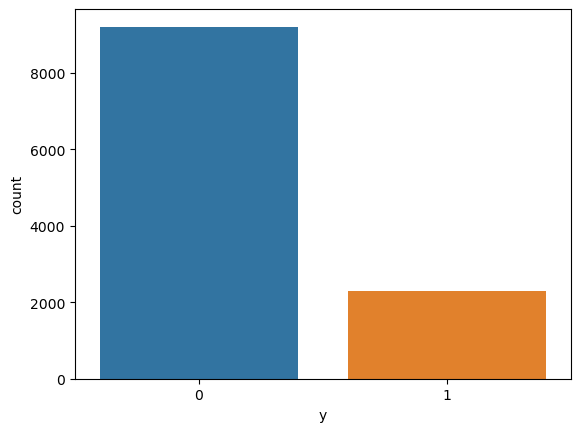

In [ ]:
cols = data.columns
tgt = data.y
tgt[tgt>1]=0
ax = sns.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


C:\Users\rjabj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


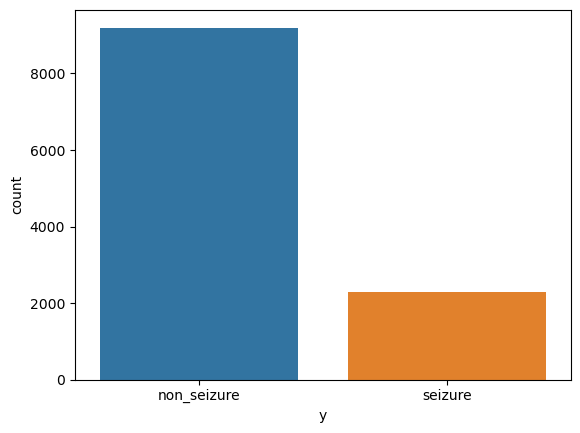

In [ ]:
cols = data.columns
tgt = data.y

# Map the values to 'non_seizure' and 'seizure'
tgt = tgt.map({0: 'non_seizure', 1: 'seizure'})

ax = sns.countplot(tgt, label="Count")
non_seizure, seizure = tgt.value_counts()

print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [ ]:
Y = to_categorical(y)
Y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size=0.2, random_state=42)
# Ensure data has the correct shape
X_train = X_train.reshape((X_train.shape[0], 178, 1))
X_test = X_test.reshape((X_test.shape[0], 178, 1))

In [ ]:
# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (9200, 178, 1)
X_test shape: (2300, 178, 1)
Y_train shape: (9200, 2)
Y_test shape: (2300, 2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 176, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 88, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 86, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 43, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           24704     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 20, 128)           0

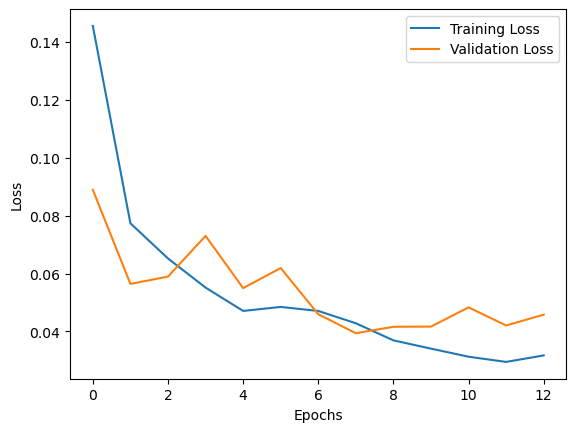

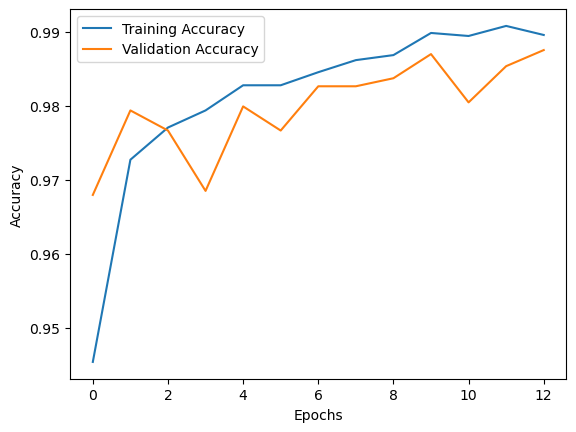

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, LSTM, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(178, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

# Calculate the correct shape
flattened_shape = model.layers[-1].output_shape[1]  # This should be 2560 based on your data
new_timesteps = 20
new_features = flattened_shape // new_timesteps  # This should be 128

# Reshape the flattened output to 3D tensor for LSTM
model.add(Reshape((new_timesteps, new_features)))  # Use the calculated shape

# Add BiLSTM layers
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))

# Add a dense layer with dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Ensure data has the correct shape
#X_train = X_train.reshape((X_train.shape[0], 178, 1))
#X_test = X_test.reshape((X_test.shape[0], 178, 1))

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_accuracy}')

# Plot training and validation metrics
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


72/72 [==============================] - 1s 9ms/step
Accuracy: 0.9882608695652174
Precision: 0.967948717948718
Recall (Sensitivity): 0.9741935483870968
F1 Score: 0.9710610932475885


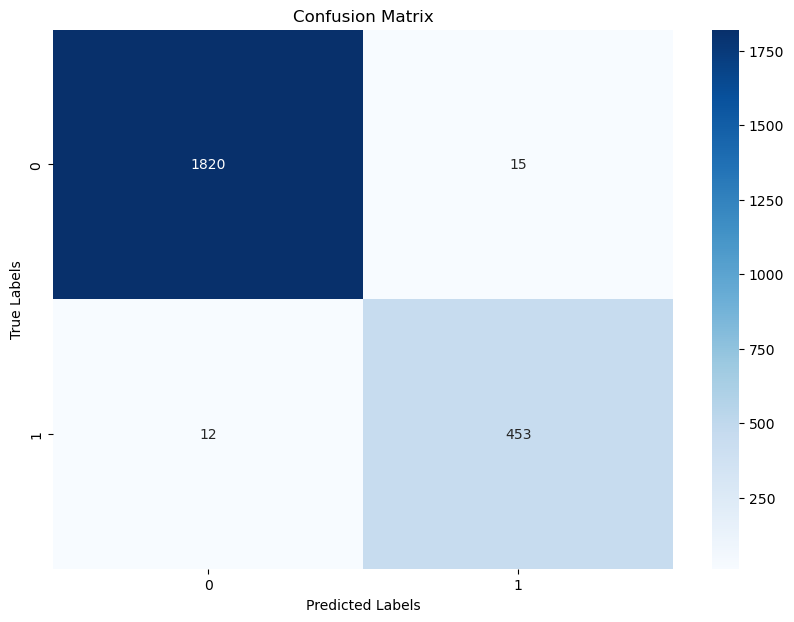

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report
)
# Predict the labels for the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(Y_true, Y_pred_classes)
precision = precision_score(Y_true, Y_pred_classes)
recall = recall_score(Y_true, Y_pred_classes)
f1 = f1_score(Y_true, Y_pred_classes)

# Print the scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall (Sensitivity): {recall}')
print(f'F1 Score: {f1}')

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Performance Metrics of Different Methods in Epileptic Seizure Detection

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


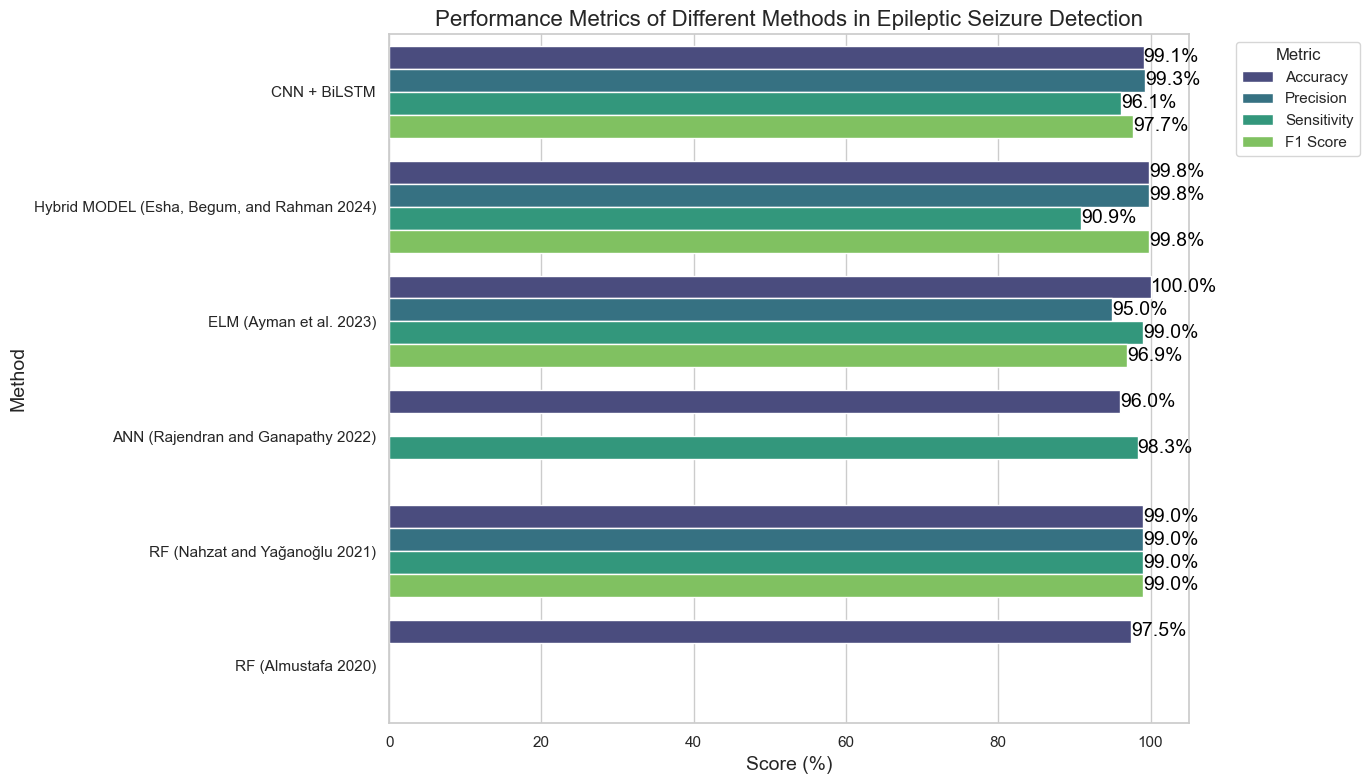

In [ ]:

data = {
    'Method': ['CNN + BiLSTM', 'Hybrid MODEL (Esha, Begum, and Rahman 2024)', 'ELM (Ayman et al. 2023)', 'ANN (Rajendran and Ganapathy 2022)', 'RF (Nahzat and Yağanoğlu 2021)', 'RF (Almustafa 2020)'],
    'Accuracy': [0.9908 * 100, 0.9981 * 100, 1 * 100, 0.96 * 100, 0.99 * 100, 97.478],
    'Precision': [0.9933 * 100, 0.998 * 100, 0.95 * 100, None, 0.99 * 100, None],
    'Sensitivity': [0.9612 * 100, 0.909 * 100, 0.99 * 100, 0.983 * 100, 0.99 * 100, None],
    'F1 Score': [0.977 * 100, 0.998 * 100, 0.969 * 100, None, 0.99 * 100, None]
}

# Create DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame
df_melted = df.melt(id_vars=['Method'], value_vars=['Accuracy', 'Precision', 'Sensitivity', 'F1 Score'],
                    var_name='Metric', value_name='Score')

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data
barplot = sns.barplot(x='Score', y='Method', hue='Metric', data=df_melted, palette='viridis', dodge=True, ax=ax)

# Add title and labels
ax.set_title('Performance Metrics of Different Methods in Epileptic Seizure Detection', fontsize=16)
ax.set_xlabel('Score (%)', fontsize=14)
ax.set_ylabel('Method', fontsize=14)

# Add percentages inside the bars
for p in barplot.patches:
    width = p.get_width()
    x = p.get_x() + width
    y = p.get_y() + p.get_height() / 2
    ax.text(x, y, f'{width:.1f}%', ha='left', va='center', fontsize=14, color='black')



# Set y-ticks and labels
ax.set_yticks(range(len(df['Method'])))
ax.set_yticklabels(df['Method'])

# Show plot
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Dataset 2 CHB-MIT

In [ ]:
datachb=pd.read_csv("c:\chbmit_preprocessed_data.csv")

In [ ]:
datachb

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,0.000081,0.000047,0.000087,0.000074,0.000113,0.000063,0.000129,-0.000037,0.000102,-0.000106,...,-0.000036,0.000072,-0.000046,-0.000060,0.000070,-0.000169,0.000060,0.000070,0.000070,1.0
2097146,0.000093,0.000055,0.000087,0.000082,0.000133,0.000058,0.000133,-0.000036,0.000088,-0.000115,...,-0.000031,0.000087,-0.000049,-0.000067,0.000076,-0.000152,0.000068,0.000063,0.000063,1.0
2097147,0.000110,0.000061,0.000078,0.000085,0.000146,0.000049,0.000130,-0.000036,0.000076,-0.000119,...,-0.000033,0.000106,-0.000058,-0.000067,0.000075,-0.000145,0.000067,0.000062,0.000062,1.0
2097148,0.000133,0.000068,0.000082,0.000085,0.000157,0.000040,0.000123,-0.000033,0.000067,-0.000124,...,-0.000036,0.000107,-0.000073,-0.000073,0.000068,-0.000129,0.000073,0.000056,0.000056,1.0


In [ ]:
datachb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097150 entries, 0 to 2097149
Data columns (total 24 columns):
 #   Column    Dtype  
---  ------    -----  
 0   # FP1-F7  float64
 1   C3-P3     float64
 2   C4-P4     float64
 3   CZ-PZ     float64
 4   F3-C3     float64
 5   F4-C4     float64
 6   F7-T7     float64
 7   F8-T8     float64
 8   FP1-F3    float64
 9   FP2-F4    float64
 10  FP2-F8    float64
 11  FT10-T8   float64
 12  FT9-FT10  float64
 13  FZ-CZ     float64
 14  P3-O1     float64
 15  P4-O2     float64
 16  P7-O1     float64
 17  P7-T7     float64
 18  P8-O2     float64
 19  T7-FT9    float64
 20  T7-P7     float64
 21  T8-P8-0   float64
 22  T8-P8-1   float64
 23  Outcome   float64
dtypes: float64(24)
memory usage: 384.0 MB


In [ ]:
datachb.describe()

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
count,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,...,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2097150.0
mean,2.860975e-07,2.240451e-07,2.069632e-07,2.165756e-07,1.987710e-07,1.810135e-07,2.261609e-07,2.413503e-07,2.743237e-07,2.484646e-07,...,2.118669e-07,2.020708e-07,2.019599e-07,2.165306e-07,2.152381e-07,2.127722e-07,1.954902e-07,1.545795e-07,1.545795e-07,0.5
std,1.286452e-04,1.002525e-04,1.040703e-04,1.025700e-04,1.311180e-04,1.213935e-04,1.361053e-04,1.169298e-04,1.328822e-04,1.335183e-04,...,1.207950e-04,1.123623e-04,1.205056e-04,1.303979e-04,1.101623e-04,1.093535e-04,1.303979e-04,1.192673e-04,1.192673e-04,0.5
min,-1.504078e-03,-1.349451e-03,-1.486105e-03,-1.452894e-03,-1.585348e-03,-2.055678e-03,-1.465006e-03,-1.427497e-03,-1.495092e-03,-1.344664e-03,...,-1.647082e-03,-1.502515e-03,-1.511795e-03,-1.685763e-03,-1.629890e-03,-2.631209e-03,-1.611136e-03,-1.874481e-03,-1.874481e-03,0.0
25%,-4.480000e-05,-3.180000e-05,-3.150000e-05,-3.460000e-05,-4.120000e-05,-3.500000e-05,-4.860000e-05,-4.040000e-05,-4.860000e-05,-4.630000e-05,...,-3.850000e-05,-3.690000e-05,-4.200000e-05,-4.360000e-05,-3.690000e-05,-3.540000e-05,-4.200000e-05,-4.040000e-05,-4.040000e-05,0.0
50%,-1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,-5.860000e-07,-5.860000e-07,...,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,2.930000e-07,2.930000e-07,2.930000e-07,0.5
75%,4.200000e-05,3.260000e-05,3.110000e-05,3.500000e-05,4.190000e-05,3.580000e-05,4.790000e-05,4.000000e-05,4.510000e-05,4.200000e-05,...,3.890000e-05,3.770000e-05,4.120000e-05,4.240000e-05,3.690000e-05,3.540000e-05,4.400000e-05,4.200000e-05,4.200000e-05,1.0
max,1.465788e-03,1.682247e-03,1.950183e-03,1.960440e-03,1.799463e-03,1.707546e-03,1.663492e-03,1.473993e-03,1.383736e-03,1.800147e-03,...,1.763516e-03,1.536899e-03,1.296215e-03,1.611526e-03,1.471258e-03,2.630037e-03,1.686154e-03,1.551355e-03,1.551355e-03,1.0


In [ ]:
datachb.isnull().sum()


# FP1-F7    0
C3-P3       0
C4-P4       0
CZ-PZ       0
F3-C3       0
F4-C4       0
F7-T7       0
F8-T8       0
FP1-F3      0
FP2-F4      0
FP2-F8      0
FT10-T8     0
FT9-FT10    0
FZ-CZ       0
P3-O1       0
P4-O2       0
P7-O1       0
P7-T7       0
P8-O2       0
T7-FT9      0
T7-P7       0
T8-P8-0     0
T8-P8-1     0
Outcome     0
dtype: int64

In [ ]:
duplicate_rows = datachb[datachb.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 962


In [ ]:
X1 = np.asarray(datachb.iloc[:, :-1])
X1 = X.astype(float)
X1

array([[ 135.,  190.,  229., ..., -116.,  -83.,  -51.],
       [ 386.,  382.,  356., ...,  154.,  143.,  129.],
       [ -32.,  -39.,  -47., ...,  -35.,  -35.,  -36.],
       ...,
       [  14.,    6.,  -13., ...,   -2.,   -1.,   -8.],
       [ -40.,  -25.,   -9., ...,   68.,   59.,   55.],
       [  29.,   41.,   57., ...,   -2.,    2.,   20.]])

In [ ]:
datachb

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,0.000081,0.000047,0.000087,0.000074,0.000113,0.000063,0.000129,-0.000037,0.000102,-0.000106,...,-0.000036,0.000072,-0.000046,-0.000060,0.000070,-0.000169,0.000060,0.000070,0.000070,1.0
2097146,0.000093,0.000055,0.000087,0.000082,0.000133,0.000058,0.000133,-0.000036,0.000088,-0.000115,...,-0.000031,0.000087,-0.000049,-0.000067,0.000076,-0.000152,0.000068,0.000063,0.000063,1.0
2097147,0.000110,0.000061,0.000078,0.000085,0.000146,0.000049,0.000130,-0.000036,0.000076,-0.000119,...,-0.000033,0.000106,-0.000058,-0.000067,0.000075,-0.000145,0.000067,0.000062,0.000062,1.0
2097148,0.000133,0.000068,0.000082,0.000085,0.000157,0.000040,0.000123,-0.000033,0.000067,-0.000124,...,-0.000036,0.000107,-0.000073,-0.000073,0.000068,-0.000129,0.000073,0.000056,0.000056,1.0


In [ ]:
X1 = np.asarray(datachb.iloc[:, :-1])
X1

array([[1.97000e-05, 1.04000e-05, 2.21000e-05, ..., 1.15000e-05,
        2.09000e-05, 2.09000e-05],
       [2.21000e-05, 8.01000e-06, 2.09000e-05, ..., 8.79000e-06,
        2.25000e-05, 2.25000e-05],
       [2.13000e-05, 1.15000e-05, 2.09000e-05, ..., 9.18000e-06,
        2.72000e-05, 2.72000e-05],
       ...,
       [1.10379e-04, 6.08000e-05, 7.79000e-05, ..., 6.74000e-05,
        6.15000e-05, 6.15000e-05],
       [1.33431e-04, 6.82000e-05, 8.19000e-05, ..., 7.29000e-05,
        5.65000e-05, 5.65000e-05],
       [1.44371e-04, 7.01000e-05, 7.79000e-05, ..., 8.15000e-05,
        4.75000e-05, 4.75000e-05]])

In [ ]:
Y1 = to_categorical("Outcome")
Y1

ValueError: invalid literal for int() with base 10: 'Outcome'

In [ ]:
y1 = np.asarray(datachb['Outcome'])

y1

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [ ]:
# Print the shapes of the datasets
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('Y_train shape:', Y_train.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (1677720, 23)
X_test shape: (419430, 23)
Y_train shape: (1677720,)
Y_test shape: (419430,)


In [ ]:
# Predict the labels for the test set
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(Y_true, Y_pred_classes)
precision = precision_score(Y_true, Y_pred_classes)
recall = recall_score(Y_true, Y_pred_classes)
f1 = f1_score(Y_true, Y_pred_classes)

# Print the scores
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall (Sensitivity): {recall}')
print(f'F1 Score: {f1}')

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

InvalidArgumentError: Graph execution error:

Detected at node sequential/conv1d/Conv1D defined at (most recent call last):
  File "C:\Users\rjabj\anaconda3\lib\runpy.py", line 197, in _run_module_as_main

  File "C:\Users\rjabj\anaconda3\lib\runpy.py", line 87, in _run_code

  File "C:\Users\rjabj\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\rjabj\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance

  File "C:\Users\rjabj\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start

  File "C:\Users\rjabj\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start

  File "C:\Users\rjabj\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever

  File "C:\Users\rjabj\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once

  File "C:\Users\rjabj\anaconda3\lib\asyncio\events.py", line 80, in _run

  File "C:\Users\rjabj\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "C:\Users\rjabj\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "C:\Users\rjabj\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "C:\Users\rjabj\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request

  File "C:\Users\rjabj\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute

  File "C:\Users\rjabj\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell

  File "C:\Users\rjabj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell

  File "C:\Users\rjabj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell

  File "C:\Users\rjabj\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner

  File "C:\Users\rjabj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async

  File "C:\Users\rjabj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes

  File "C:\Users\rjabj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code

  File "C:\Users\rjabj\AppData\Local\Temp\ipykernel_23120\303000708.py", line 2, in <module>

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2631, in predict

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 290, in call

  File "C:\Users\rjabj\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 262, in convolution_op

convolution input must be 4-dimensional: [1,32,23]
	 [[{{node sequential/conv1d/Conv1D}}]] [Op:__inference_predict_function_34443]